# **Неделя 8. Кластеризация**

## **Домашняя работа**

Ссылка на форму: https://forms.gle/KSYMddDLLznPYdVaA

Импортируем необходимые модули

In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import adjusted_rand_score, silhouette_samples

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42

Загрузим датасет Boston House Prices

Описание датасета: https://www.kaggle.com/c/boston-housing

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


####  **Задание 1.** 

Алгоритмы кластеризации зачастую плохо работают с категориальными признаками. Найдите категориальные признаки в датасете. Сколько их?

*Подсказака: Прочтите описание датасета и исследуйте данные*

In [26]:
#your code here
print(boston['DESCR'])
#print(count(data.CRIM.unique()))
for col in data.columns:
    print('Feature-{}, количество уникальных значений-{:<13}'.format(col, data[col].value_counts().count()))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Answer:** rad, chas

####  **Задание 2.** 

Почему кластеризация категориальных признаков работает плохо? Вспомните, как работают алгоритмы кластеризации, как происходит определение схожести объектов. Ответ напишите в форме. 

**Answer:** Так как алгоритмы кластеризации основываются на близости объектов то в случае с категориальными признаками получается проблема-как определить как далеко или близко находятся категории, другими словами непонятно как измерять расстояние между ними, например, если расстояние между двумя категориями равно какому-то числу, то появляется логичный вопрос - как это число интерпретировать. 

Чтобы алгоритм корректно работал с категориальными признаками, мы можем сделать следующее:
   1. Исключить признаки, но потерять информацию.
   2. Преобразовать признаки так, чтобы они перестали быть категориальными.
       1. Закодировать их статистиками другого, некатегориального признака.
       2. Использование методов понижения размерности, таких как MCA.
   3. Использовать подходящий алгоритм кластеризации(KModes и др.) или метрику расстояния(Gower distance и др.)

Так как число категориальных признаков в нашем датасете мало, исключим их.
Выбросьте из датасета найденные ранее категориальные признаки.

In [29]:
cat_featrues = ['CHAS','RAD'] # список категориальных признаков. Внесите в него найденные.
data.drop(cat_featrues, axis=1, inplace=True)

#### **Задание 3.**

Для корректной работы алгоритмов кластеризации необходимо привести признаки к одному масштабу. Отмасштабируйте данные с помощью StandartScaler. 

Чему **приблизительно** равно среднее значение признака AGE после масштабирования?

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)#your code here

In [44]:
#your code here
print(data.columns)
scaled_data_pd = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data_pd['AGE'].mean()

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')


-2.650492912543852e-16

Для визуализации датасета понизим размерность данных с помощью метода главных компонент(PCA):

In [48]:
pca = PCA(random_state=RANDOM_STATE)
embeded_data = pca.fit_transform(scaled_data)

embeded_data.shape

(506, 12)

#### **Задание 4.**

Какая доля объясненной дисперсии содержится в первых 2 главных компонентах?

*Подсказака: PCA.explained_variance_ratio_*

In [53]:
pca = PCA()
embeded_data = pca.fit_transform(scaled_data)
round(pca.explained_variance_ratio_[:2].sum(),2)

0.61

Визуализируем датасет:

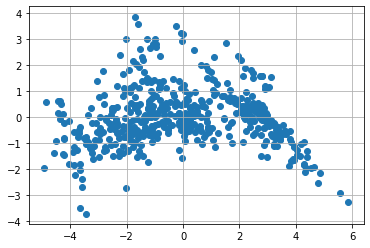

In [54]:
plt.scatter(embeded_data[:,0], embeded_data[:,1])
plt.grid()

------------------------

#### **Задание 5.**
Попробуйте выполнить кластеризацию отмасштабированных данных с помощью алгоритма KMeans со следующими параметрами:
* n_clusters = 5
* n_init = 20
* random_state = RANDOM_STATE
    
Чему равна сумма квадратов отклонений объектов от центров их кластеров?

*Подсказка: Можете вычислить сумму квадратов отклонений сами, центры кластеров можно найти в KMeans.cluster_centers_, но данное значение уже рассчитывается алгоритмом KMeans, найти его можно прочитав документацию: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html*

In [57]:
### your code here
kmeans = KMeans(n_clusters=5,n_init=20,random_state=RANDOM_STATE)
kmeans.fit(scaled_data)
round(kmeans.inertia_,2)

2195.35

#### **Задание 6.**
За что отвечает параметр n_init алгоритма KMeans?

**Answer**: Число случайных перезапусков

#### **Задание 7.**
Число кластеров k нам неизвестно. Подберите k по методу локтя. 

Не забудьте зафиксировать **random_state=RANDOM_STATE** и **n_init = 20**.

*Визуально оптимальное k не всегда может быть очевидно. Можете определить k более формальным методом:*

$$D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|} \rightarrow \min\limits_k$$

In [61]:
inertias = []
ks = list(range(1,15))
for k in ks:
    #your code here
    kmeans = KMeans(n_clusters=k,n_init=20,random_state=RANDOM_STATE)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

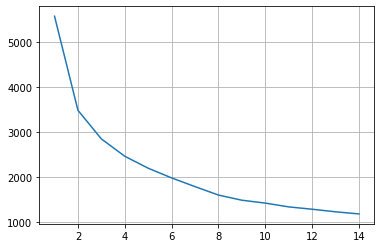

In [62]:
plt.plot(ks,inertias)
plt.grid()

#### **Задание 8.**

Оцените качество кластеризации алгоритмом KMeans с помощью метрики silhouette.

Парамтеры KMeans:
* Число кластеров k = найденному в предыдущем задании значению
* random_state=RANDOM_STATE
* n_init = 20

Чему равно значение silhouette?

In [68]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, n_init=20,random_state=RANDOM_STATE)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

round(silhouette_score(scaled_data, clusters),2)

0.35

Визуализируйте получившуюся кластеризацию. Номер кластера обозначьте цветом точек.

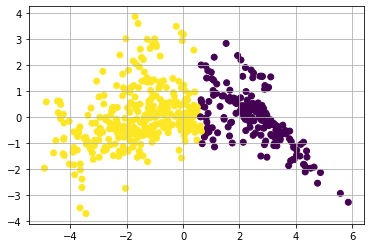

In [65]:
#clusters = #найденные кластеры
plt.scatter(embeded_data[:,0], embeded_data[:,1], c = clusters)
plt.grid()

#### **Задание 9.**

Ответьте на следующие вопросы в форме:
1. Сколько явно выделяющихся кластеров можно увидеть?
2. Исходя из визуализации и значения метрики можно ли назвать данную кластеризацию хорошей? Почему?
3. Подходит ли алгоритм KMeans для данного датасета? Почему?

------------------------

#### **Задание 10.**

Попробуем применить другой алгоритм. Кластеризуйте датасет с помощью DBSCAN, параметры алгоритма оставьте по умолчанию. Сколько кластеров нашел алгоритм?

In [85]:
#your code here
dbscan = DBSCAN()
dbscan.fit(scaled_data)
dbscan_lbls = dbscan.labels_
dbscan_lbls

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

**Answer:** 5

Визуализируйте результат кластеризации. 

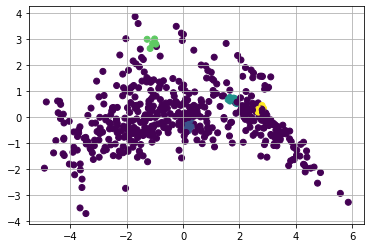

In [86]:
#your code here
plt.scatter(embeded_data[:,0], embeded_data[:,1], c = dbscan_lbls)
plt.grid()

Посчитайте метрику silhouette. 

In [87]:
#your code here
round(silhouette_score(scaled_data, dbscan_lbls),2)

-0.3

Получается как-то не очень.

DBSCAN чувствителен к выбору параметров. Параметры по умолчанию для нашего датасета совсем не подходят! 

Попробуем подобрать параметры сами.

Параметр **min_samples** - минимальное число точек в eps окрестности точки для образования кластера. Данный параметр, как правило, выбирается исходя из целей кластеризации. Чем меньше min_samples тем более разреженными могут быть кластеры, число кластеров, скорее всего, будет больше.

**Eps** - радиус окрестности, внутри которой точки считаются лежащими в одном кластере.
Параметр **eps** можно подобрать по следующему алгоритму:
   1. Выбираем некоторое значение min_samples = m.
   2. Для каждого объекта вычисляем расстояние до всех остальных объектов.
   3. Для каждого объекта запоминаем расстояния до его m-го ближайшего соседа.
   4. Сортируем расстояния и отрисовываем их на графике (ось x - номер объекта после сортировки, y - расстояние до его m-го соседа).
   5. Точка, в которой начинается резкий рост расстояния (возрастание y) скорее всего будет являться подходящим eps для данного min_samples. 

##### **Практический смысл алгоритма:** 
Плотность кластеров считаем примерно одинаковой(или ограниченной сверху), следовательно, должно быть такое расстояние EPS между двумя точками, больше которого точки считаются принадлежащим разным кластерам, а меньше - одному. 

Значение расстояния, после которого начинается резкий рост расстояний между m-тыми соседями, будем считать EPS.

#### **Задание 11.**

Попробуйте подобрать eps по описанному выше алгоритму для min_samples = 5. В каком диапазоне лежит подходящее значение eps?

In [90]:
from sklearn.metrics import pairwise_distances
pairwise_dist = pairwise_distances(scaled_data, metric='euclidean') #вычисляем матрицу попарных расстояний между объектами
pairwise_dist.shape

(506, 506)

Text(0.5, 1.0, 'матрица расстояний')

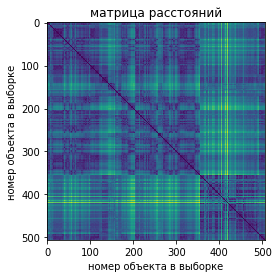

In [91]:
plt.imshow(pairwise_dist)
plt.xlabel('номер объекта в выборке')
plt.ylabel('номер объекта в выборке')
plt.title('матрица расстояний')

In [92]:
pairwise_dist.sort(axis=1) # сортируем строки матрицы по возрастанию

Text(0.5, 1.0, 'отсортированная по строкам матрица расстояний')

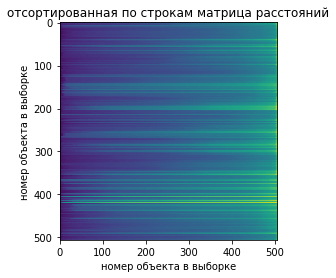

In [93]:
plt.imshow(pairwise_dist)
plt.xlabel('номер объекта в выборке')
plt.ylabel('номер объекта в выборке')
plt.title('отсортированная по строкам матрица расстояний')

In [94]:
min_samples = 5

In [95]:
dists_to_neighbour = pairwise_dist[:, min_samples].copy() # выбираем из матрицы min_samples'й столбец 
                                                            #- расстояние до соответств. соседа
dists_to_neighbour.sort() # сортируем расстояния

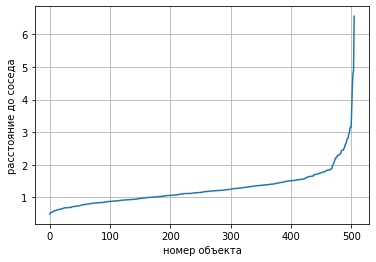

In [96]:
plt.plot(dists_to_neighbour)
plt.xlabel('номер объекта')
plt.ylabel('расстояние до соседа')
plt.grid()

#### **Задание 12.**

Кластеризуйте данные с помощью DBSCAN. Параметры алгоритма:
  * eps - значение, выбранное на предыдущем этапе.
  * min_samples = 5
  
Оцените качество кластеризации с помощью метрики silhouette. Согласно метрике silhouette, качество кластеризации алгоритмом DBSCAN хуже чем KMeans?

In [97]:
#your code here
dbscan = DBSCAN(eps=2., min_samples=5)
dbscan.fit(scaled_data)
round(silhouette_score(scaled_data, dbscan.labels_),2)

0.32

#### **Задание 13.**

Визуализируйте результат кластеризации. Можете варьировать значение eps. Ответьте в форме на следующий вопрос:

С вашей точки зрения разбиение на кластеры данного датасета алгоритмом DBSCAN лучше или хуже разбиения алгоритма KMeans? Почему?

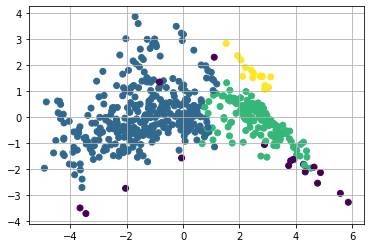

In [98]:
#your code here
plt.scatter(embeded_data[:,0], embeded_data[:,1], c = dbscan.labels_)
plt.grid()

------------------------

Кластеризовать можно объекты, описанные не только некоторыми признаками (одна строчка - один объект), но и изображения, временные ряды и т.д. Главное, ввести правильную метрику расстояния между объектами или преобразовать объекты так, чтобы они описывались некоторыми признакими(не обязательно понятными человеку).

Например, с изображениями часто поступают так:
1. Обучают нейронную сеть(autoencoder) сжимать изображение в некоторый вектор фиксированной размерности.
2. Кластеризуют векторы обычным алгоритмом кластеризации.

Для временных рядов можно использовать тот же подход, но можно и ввести метрику расстояния(DTW, Frechet) между разными временными рядами, вычислить попарные расстояния и кластеризовать их обычным алгоритмом кластеризации. Главное,чтобы он поддерживал работу с расстояниями, а не только с исходными объектами.